**Akhmad Syafrie Syamsudin - 05211840000115**

**Rochim Farul Noviyan - 05211840000108**

# Library
Dalam mengerjakan quiz 2 ini kami menggunakan beberapa library yaitu math, random, matplotlib, pandas dan ipython. 

* math, kami gunakan untuk menghitung akar pangkat
* random, kami gunakan untuk mendapatkan angka acak
* matplotlib, kami gunakan untuk memvisualisasikan data
* ipython, kami gunakan untuk melakukan printing tabel



In [23]:
import math
import random
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

# Dataset

Kami menggunakan dataset 
[burma14.tsp](http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/burma14.tsp). Didalam dataset tersebut terdapat 14 kota di negara burma lengkap dengan koordinatnya. Sayangnya kami tidak mengetahui satuan yang dipakai oleh dataset ini.

In [24]:
dataset = [
   (1, 16.47, 96.10),
   (2, 16.47, 94.44),
   (3, 20.09, 92.54),
   (4, 22.39, 93.37),
   (5, 25.23, 97.24),
   (6, 22.00, 96.05),
   (7, 20.47, 97.02),
   (8, 17.20, 96.29),
   (9, 16.30, 97.38),
  (10, 14.05, 98.12),
  (11, 16.53, 97.38),
  (12, 21.52, 95.59),
  (13, 19.41, 97.13),
  (14, 20.09, 94.55)
]

# Fungsi

## Fungsi `map_gen`
Fungsi `map_gen` digunakan untuk menghasilkan matriks dua dimensi berisikan data jarak antar dua buah kota atau node. Fungsi ini menerima input berupa `list` yang didalamnya terdapat `list` atau `tuple` dengan index ke 1 berisikan koordinat x dan index ke 2 berisikan koordinat y. Jarak antar dua buah node ditentukan dengan rumus berikut.

![formula_1.png](formula_1.png)

In [25]:
def map_gen(dataset):
  # Menentukan panjang dan lebar matriks
  w, h = len(dataset), len(dataset)

  # Membuat matriks kosong dengan panjang lebar sesuai panjang data
  map = [[0 for x in range(w)] for y in range(h)] 

  # Mengisi matriks dengan data jarak menggunakan rumus
  for i in range(len(dataset)):
    for j in range(len(dataset)):
      x1 = dataset[i][1]
      x2 = dataset[j][1]
      y1 = dataset[i][2]
      y2 = dataset[j][2]
      map[i][j] = round(math.sqrt(((x2-x1)**2) + ((y2-y1)**2)), 2)
    
  # Mengembalikan matriks
  return map

## Fungsi `map_as_table`

Fungsi `map_as_table` merupakan fungsi bantuan yang kami gunakan untuk menampilkan isi dari `list` sebagai tabel.

In [26]:
def map_as_table(map, **kwargs):
  # Menjadikan `list` sebagai pandas data frame
  df = pd.DataFrame(data=map)
  
  # Percabangan dibawah ini untuk keperluan kustomisasi nilai `columns`
  # dan `index` dari dataframe
  if "columns" in kwargs:
    df.columns = kwargs.get("columns")
  else:
    df.columns+=1

  if "index" in kwargs:
    df.index = kwargs.get("index")
  else:
    df.index+=1
  
  # Visualisasi dataframe sebagai tabel dua dimensi
  display(df)

## Fungsi `population_gen`

Fungsi `population_gen` menerima dua input, dataset dan `number_of_population`. Fungsi ini mengahasilkan kromosom, dalam hal ini rute perjalanan, sebanyak isi dari argumen `number_of_population`.

In [27]:
def population_gen(dataset, number_of_population):
  # panjang dataset disimpan agar tidak perlu berkali kali memanggil fungsi len
  dataset_length = len(dataset)

  # Mempersiapkan `list` untuk menyimpan populasi baru
  population = []

  # Generate populasi dengan ukuran sesuai `number_of_population`
  for i in range(number_of_population):
    population.append( 
        # Randomisasi untuk mendapatkan kromosom dengan rentang sesuai dataset
        random.sample( [i for i in range(dataset_length)], dataset_length ) 
    )
  return population

## Fungsi `fitness`

Fungsi `fitness` merupakan salah satu fungsi yang sifatnya wajib dalam GA. Fungsi ini akan menghitung seberapa baik kromosom yang dihasilkan. Fungsi `fitness` kami menerima dua input yaitu `individu` dan `map`. Individu merupakan individual kromosom yang akan dinilai. Sedangkan `map` merupakan matriks dua dimensi yang didalamnya menyimpan informasi jarak antar kota atau node.

Fungsi `fitness` mengembalikan `tuple` dengan isi nilai fitness, individu/kromosom dan jarak total. Perhitungan nilai fitness didasarkan pada rumus berikut.

![formula_2.png](formula_2.png)

In [28]:
def fitness(individu, map):
  # Inisiasi variabel untuk menyimpan total jarak
  distance = 0

  # Iterasi untuk mendapatkan total jarak
  for idx in range(len(individu)):
    if idx == (len(individu)-1):
      break
    else:
      distance += map[individu[idx]][individu[idx+1]]
      
  # Mengembalikan nilai fitness, rute, dan jarak total
  return ((1/distance), individu , distance)

## Fungsi `grade`

Fungsi `grade` merupakan fungsi yang akan merangking individu dalam suatu populasi berdasarkan nilai fitness yang dimiliki. Fungsi ini akan mengembalikan `list` populasi dengan individu pemilik nilai fitness terbesar (total jarak terkecil) berada pada indeks terkecil.

In [29]:
def grade(population, map, fitness):
  # Menyiapkan `list` untuk menampung rute beserta dengan nilai fitnessnya
  graded = []

  # Mengisi `list` dengan rute dan nilai fitnessnya
  for individu in population:
    graded.append(fitness(individu, map))
  
  # Mengembalikan populasi yang telah di urutkan berdasarkan nilai fitness
  # Rute dengan nilai fitness terbesar akan berada pada indeks yang kecil
  return [i[1] for i in sorted(graded, reverse=True)]

## Fungsi `crossover`

Fungsi `crossover` juga termasuk kedalam fungsi utama dalam GA. Fungsi `crossover` atau rekombinasi kami gunakan untuk menyilangkan dua individu terbaik dalam suatu populasi. Fungsi ini hanya menghasilkan satu *children/offspring* saja. Dengan menggunakan menggunakan metode *ordered crossover*.

In [30]:
def crossover(a, b):
  # Menyiapkan `list` untuk menyimpan children
  # Sebenarnya `list` tidak terlalu perlukan namun akan sangat membantu
  # jika perlu mengembalikan lebih dari satu children
  child = []
  def cross(parent1, parent2):
    # Melakukan crossover dengan metode ordered crossover
    div_idx_1 = 5
    div_idx_2 = 10
    slices = parent1[div_idx_1:div_idx_2]
    not_in_slices = [i for i in parent2 if i not in slices]
    offspring = not_in_slices[0:div_idx_1] + slices + not_in_slices[div_idx_1:]
    return offspring
  
  child.append(cross(a,b))
  return child[0]
  # child.append(cross(b,a))
  # return child

## Fungsi `mutate`

Fungsi `mutate` merupakan fungsi untuk menghasilkan individu *mutant*. Fungsi ini menerima dua input yaitu `individu` dan `chance_to_mutate`. Individu merupakan kromosom atau individu yang akan dimutasi. Sedangkan `chance_to_mutate` sebagai pengatur probabilitas apakah suatu individu itu perlu dimutasi atau tidak. Metode yang kami gunakan untuk memutasi adalah *reciprocal exchange mutation*.

Fungsi `mutate` yang kami implementasikan termasuk kedalam fungsi *non-deterministik* karena didalamnya terdapat randomisasi oleh fungsi `random.random()`. Fungsi tersebut memungkinkan terjadinya `side-effect` dimana fungsi dapat menghasilkan luaran yang berbeda meskipun inputnya sama. Fungsi `mutate` juga termasuk sebagai fungsi utama algoritma GA.

In [31]:
def mutate(individu, chance_to_mutate) :
  # Menyalin kromosom agar mendukung konsep "immutability"
  mutant = individu[:]
  # Randomisasi untuk menentukan apakah mutasi perlu dilakukan dan dimana
  r = random.random()
  first_idx = random.randint(0, len(individu)-1)
  second_idx = random.randint(0, len(individu)-1)
  if chance_to_mutate > r:
    # Memutasi mutant dengan metode reciprocal exchange mutation
    mutant[first_idx],mutant[second_idx] = mutant[second_idx],mutant[first_idx]
  return mutant


## Fungsi `plot_best`
Fungsi `plot_best` merupakan fungsi bantuan yang kami buat untuk memvisualisaksikan rute atau kromosom atau individu kedalam peta.

In [32]:
def plot_best(route, map):
  # Untuk membersihkan kanvas, agar visualisasi tidak tertumpuk
  plt.figure()

  # Pemetaan nilai x dan y
  x=[0.5] + [x + 0.5 for x in route[0:len(route)-1]] + [len(map) - 0.5]
  y=[0.5] + [x + 0.5 for x in route[1:len(route)]] + [len(map) - 0.5]

  # Menampilkan plotting
  plt.plot(
      x,
      y,
      marker = 'o',
      linewidth=1,
      markersize=5,
      linestyle = "-",
      color='teal'
      )

## Fungsi `main`

Fungsi `main` merupakan fungsi utama dari keseluruhan program kami. Fungsi `main` berperan dalam mengatur alur program berjalan dan pemanggilan fungsi yang telah kami definisikan pada bagian sebelumnya.

Dalam menyusun alur program kami menggunakan referensi berupa paper dengan judul *Implementasi Kombinasi Algoritma Genetika dan Tabu Search untuk Penyelesaian Travelling Salesman Problem*. Paper tersebut dapat ditemukan pada tautan [berikut.](https://journal.uii.ac.id/AUTOMATA/article/view/17343) Namun terdapat alur yang kami rubah karena disini kami hanya fokus pada Genetic Algorithm saja tanpa bantuan Tabu Search.

Dalam fungsi `main` kami mendefinisikan 3 konstan yaitu `NUMBER_OF_POPULATION`, `NUMBER_OF_GENERATION`, dan `CHANCE_TO_MUTATE`. Konstan pertama, `NUMBER_OF_POPULATION`, kami gunakan sebagai penentu ukuran populasi awal yang akan di*generate*. Kami memilih ukuran 5 karena menyesuaikan dengan paper [rujukan](https://journal.uii.ac.id/AUTOMATA/article/view/17343) kami. Konstan kedua, `NUMBER_OF_GENERATION`, menentukan jumlah iterasi yang akan dilakukan oleh program. Pemilihan 100 sebagai jumlah iterasi adalah murni inisiatif kami sendiri. Karena menurut kami 100 generasi sudah cukup untuk menunjukkan bagaimana GA membantu penyelesaian permasalahan TSP. Konstan terakhir, `CHANCE_TO_MUTATE`, berfungsi sebagai pengatur probabilitas mutasi. Kami memilih nilai 1 agar mutasi selalu terjadi dan pergantian generasi terbaik menjadi lebih cepat.

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
1,0.00,1.66,5.08,6.52,8.83,5.53,4.10,0.75,1.29,3.15,1.28,5.08,3.12,3.94
2,1.66,0.00,4.09,6.02,9.20,5.76,4.76,1.99,2.94,4.40,2.94,5.18,3.98,3.62
3,5.08,4.09,0.00,2.45,6.96,4.00,4.50,4.73,6.15,8.22,6.01,3.37,4.64,2.01
4,6.52,6.02,2.45,0.00,4.80,2.71,4.12,5.96,7.29,9.60,7.10,2.38,4.80,2.59
5,8.83,9.20,6.96,4.80,0.00,3.44,4.77,8.09,8.93,11.21,8.70,4.06,5.82,5.80
6,5.53,5.76,4.00,2.71,3.44,0.00,1.81,4.81,5.85,8.22,5.63,0.66,2.81,2.43
7,4.10,4.76,4.50,4.12,4.77,1.81,0.00,3.35,4.19,6.51,3.96,1.77,1.07,2.50
8,0.75,1.99,4.73,5.96,8.09,4.81,3.35,0.00,1.41,3.64,1.28,4.38,2.36,3.37
9,1.29,2.94,6.15,7.29,8.93,5.85,4.19,1.41,0.00,2.37,0.23,5.52,3.12,4.73
10,3.15,4.40,8.22,9.60,11.21,8.22,6.51,3.64,2.37,0.00,2.59,7.89,5.45,7.02


,generation,distance,best_distance
1,1,52.21,52.21
2,2,56.64,52.21
3,3,48.05,48.05
4,4,48.94,48.05
5,5,55.39,48.05
...,...,...,...
96,96,52.72,37.83
97,97,55.99,37.83
98,98,52.72,37.83
99,99,50.40,37.83


Rute terbaik yang ditemukan [4, 9, 12, 3, 6, 5, 10, 0, 1, 7, 11, 13, 8, 2]
Dengan jarak 54.98000000000001


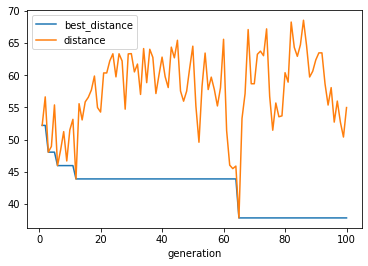

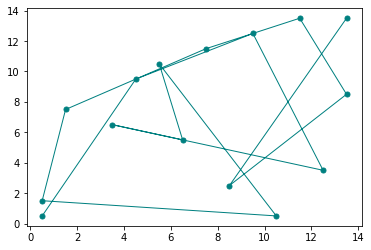

In [33]:
def main(dataset):
  # Konversi dataset menjadi matrix jarak
  map = map_gen(dataset)
  map_as_table(map)

  # Menentukan jumlah populasi dan generasi
  NUMBER_OF_POPULATION = 5 
  NUMBER_OF_GENERATION = 100
  CHANCE_TO_MUTATE = 1

  # Sampling populasi
  population = population_gen(dataset, NUMBER_OF_POPULATION)

  # Menyimpan kromosom terbaik tiap generasi
  best_per_gen = []
  best_route = None

  # Iterasi untuk setiap generasi
  for generation in range(NUMBER_OF_GENERATION):

    # Grading
    graded_population = grade(population, map, fitness)

    # Mengambil dua terbaik untuk di silangkan
    grade_one = graded_population[0]
    grade_two = graded_population[1]

    population.remove(grade_one)

    # Menyimpan yang terbaik
    if best_route is None:
      best_per_gen.append((generation+1, grade_one, grade_one))
      best_route = grade_one[:]
    else:
      if fitness(grade_one,map)[2] < fitness(best_route,map)[2]:
        best_route = grade_one[:]
      best_per_gen.append((generation+1, grade_one, best_route))

        
    # Menyilangkan untuk mendapatkan anak baru
    child = crossover(grade_one, grade_two)

    # Memutasi anak
    mutant = mutate(child, CHANCE_TO_MUTATE)

    # Menambahkan anak ke populasi
    population.append(mutant)

  # Pemetaan hasil kedalam list
  results = []
  for idx, route, best_route in best_per_gen:
    distance = fitness(route, map)[2]
    best_distance = fitness(best_route, map)[2]
    results.append([idx, distance, best_distance])

  # Menampilkan hasil sebagai tabel
  map_as_table(results, columns=['generation', 'distance', 'best_distance'])

  # Menjadikan hasil sebagai pandas dataframe
  df = pd.DataFrame(
      data=results,
      columns=['generation', 'distance', 'best_distance']
    )
  
  # Memvisualkan grafik konvergen dan best fitness per generasi
  df.plot.line(x='generation', y=['best_distance', 'distance'])

  # Rute terbaik
  route = best_per_gen[-1][1]
  print(f'Rute terbaik yang ditemukan {route}')
  print(f'Dengan jarak {fitness(route,map)[2]}')

  # Memvisualkan rute terbaik
  plot_best(route, map)

# Memanggil fungsi main
main(dataset)